In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels import api as sm
from sklearn.metrics import mean_squared_error, r2_score

# Preprocessing

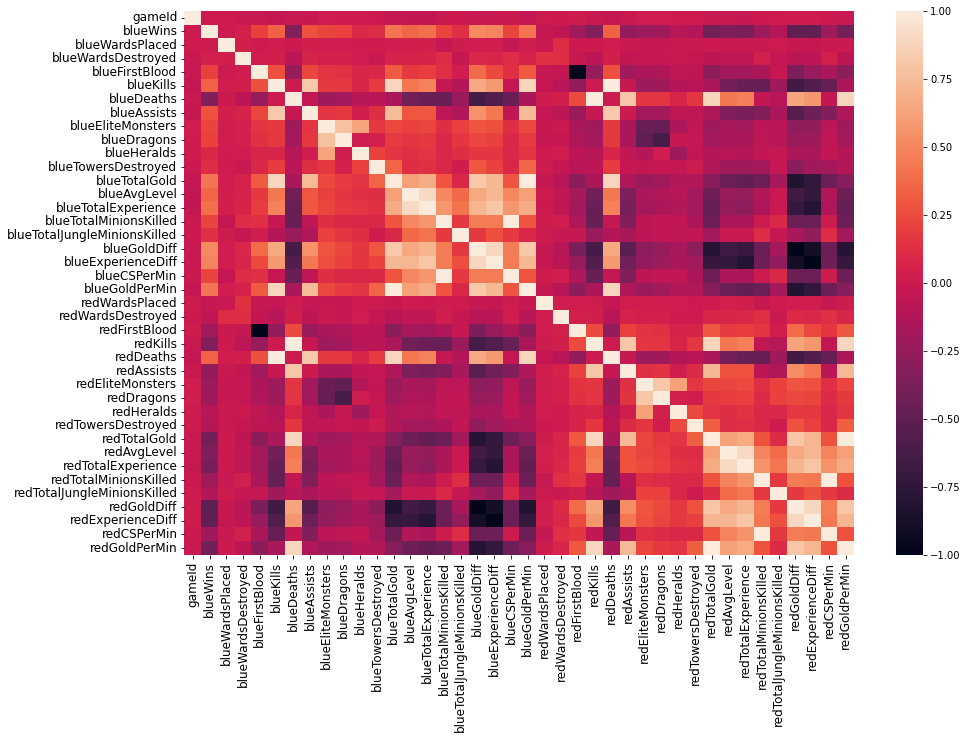

In [8]:
data = pd.read_csv('high_diamond_ranked_10min.csv')
x = data.drop(['gameId', 'blueWins'], axis=1) # skip gameId and blueWins
y = data['blueWins'] # blueWins

corr_coeffs = data.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_coeffs, vmin=-1.0, vmax=1.0)
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 12)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 12)
fig.set_facecolor('white')

^ remove redDeaths + blueDeaths => they're highly correlated with red/blueKills (obviously)

CSPerMin, and GoldPerMin could be removed as they are related to the TotalMinions etc, and TotalGold. AND we're predicting at 10 min, not per minute. (probably?)

### Clean + Split

In [12]:
x = x.drop(['redDeaths', 'blueDeaths', 'redCSPerMin', 'blueCSPerMin', 'redGoldPerMin', 'blueGoldPerMin'], axis=1)

In [13]:
cutoff_train = round(x.shape[0] * 0.5)
cutoff_val = round(x.shape[0] * 0.75)
print(cutoff_train)
print(cutoff_val)

train_X = x[:cutoff_train].to_numpy()
train_y = y[:cutoff_train].to_numpy()

val_X = x[cutoff_train:cutoff_val].to_numpy()
val_y = y[cutoff_train:cutoff_val].to_numpy()

test_X = x[cutoff_val:].to_numpy() # the rest
test_y = y[cutoff_val:].to_numpy()

print(train_X.shape)
print(val_X.shape)
print(test_X.shape)

print(test_y.shape)

4940
7409
(4940, 32)
(2469, 32)
(2470, 32)
(2470,)


### Standardise

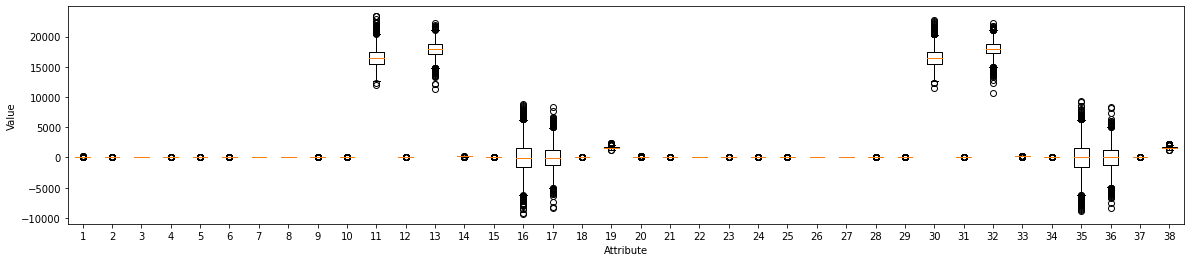

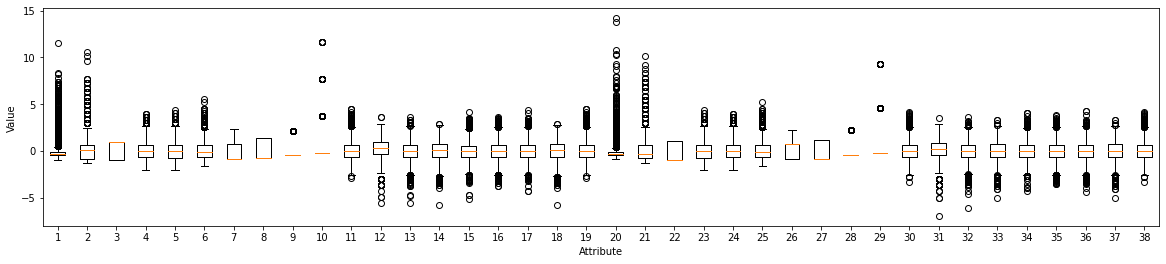

In [10]:
fig, ax = plt.subplots(figsize=(20,4))
plt.boxplot(train_X)
plt.xlabel("Attribute")
plt.ylabel("Value")
fig.set_facecolor('white')

mu = np.mean(train_X, axis=0)
sigma = np.std(train_X, axis=0)
std = (train_X - mu) / sigma
fig, ax = plt.subplots(figsize=(20,4))
plt.boxplot(std)
plt.xlabel("Attribute")
plt.ylabel("Value")
fig.set_facecolor('white')

^ profound effect, so standardise

In [11]:
train_X = (train_X - mu) / sigma
val_X = (val_X - mu) / sigma
test_X = (test_X - mu) / sigma

# Regularised linear regression

# DNN (dense layers)

# 3rd idk yet